In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import statistics
import pandas as pd

from matplotlib.ticker import PercentFormatter

import seaborn as sns
sns.set()

In [7]:
wine = pd.read_csv('../datasets/wine.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [118]:
def plot_measures(dataset, dataset_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)
    
    accuracy = np.asarray(dataset.loc['accuracy']) * 100
    precision = np.asarray(dataset.loc['precision']) * 100
    recall = np.asarray(dataset.loc['recall']) * 100
    fscore = np.asarray(dataset.loc['fscore']) * 100
    C_params = np.asarray(wine_results.loc['C'])
    M_params = np.asarray(wine_results.loc['M'])

    x_names = list(dataset)
    x = [int(k) for k in x_names]
    
#     x_names = [(name + '\nC = ' + str(C_params[i]) + '\nM = ' + str(M_params[i])) for i, name in enumerate(x_names)]
    
    plt.plot(x, accuracy, 'rX-', alpha=0.8, label='Accuracy')
    plt.plot(x, precision, 'bs-', alpha=0.8, label='Precision')
    plt.plot(x, recall, 'g^-', alpha=0.8, label='Recall')
    plt.plot(x, fscore, 'ko-', alpha=0.8, label='F-score')

    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.title(dataset_name.upper() + ' dataset - best measure values for different cross validation fold size')
#     plt.xticks(x, x_names)
    plt.legend(loc=1)
    fig.savefig(dataset_name + '_best_measures_plot.png', dpi=150)
    
    plt.show()

In [121]:
dataset_name = 'diabetes'
results = pd.read_csv('../results_' + dataset_name + '.csv', index_col=0)
results

,2,3,5,10
accuracy,0.685999,0.680360,0.705922,0.696310
precision,0.760001,0.760402,0.779655,0.773504
recall,0.905944,0.872142,0.868676,0.871675
fscore,0.826579,0.811849,0.820417,0.816588
C,0.100000,0.150000,0.100000,0.350000
M,35.000000,14.000000,28.000000,35.000000


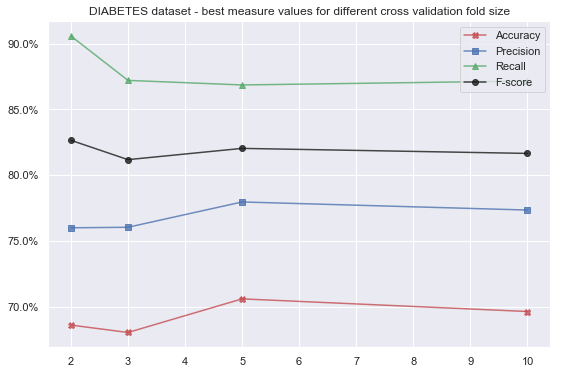

In [122]:
plot_measures(results, dataset_name)